In [57]:
# import essential libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import matplotlib.pyplot as plt
import seaborn as sns

import pickle

import os

In [2]:
# import library for normalizing, modeling, evaluate
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, auc
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [3]:
for dirname, _, filenames in os.walk('../../resources/portuguese-banking (phone calls)/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

../../resources/portuguese-banking (phone calls)/test.csv
../../resources/portuguese-banking (phone calls)/README.md
../../resources/portuguese-banking (phone calls)/train.csv


In [4]:
# read dataset
train = pd.read_csv('../../resources/portuguese-banking (phone calls)/train.csv', sep=';')
test = pd.read_csv('../../resources/portuguese-banking (phone calls)/test.csv', sep=';')

### Drop Columns
Because there is no year information that some months have more data than the others so it is going to make the data bias. We are going to drop `month` and `day`

In [5]:
train.drop(['day', 'month'], axis=1, inplace=True)
test.drop(['day', 'month'], axis=1, inplace=True)

In [6]:
train

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,508,4,-1,0,unknown,no


**Changing Data Type**

We are going to change four categorical columns into numerical columns because they have binary values. (`default`, `housing`, `loan`, `y`)

In [7]:
for col in ['default', 'housing', 'loan', 'y']:
    train[col].replace(['yes', 'no'], [1, 0], inplace=True)
    test[col].replace(['yes', 'no'], [1, 0], inplace=True)

In [8]:
train

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,cellular,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,0,1729,0,0,cellular,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,0,5715,0,0,cellular,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,0,668,0,0,telephone,508,4,-1,0,unknown,0


### Feature selection (ref [link](https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/))

<p align="center">
    <b>Overview of Feature Selection Techniques</b>
<p>

<p align="center">
    <img src="../../assets/img/Overview-of-Feature-Selection-Techniques3.webp">
</p>

<p align="center">
    <b>How to Choose Feature Selection Menthos</b>
<p>

<p align="center">
    <img src="../../assets/img/How-to-Choose-Feature-Selection-Methods-For-Machine-Learning.webp">
</p>


**Seperate Columns**

We are going to separate the categorical and numerical columns because they will be treated differently.

In [9]:
train.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'], dtype=object)

In [10]:
cat_cols = ['job', 'marital', 'education', 'poutcome']
num_cols = ['age', 'default', 'balance', 'housing', 'loan', 'duration', 'campaign', 'pdays', 'previous']
tar_cols = ['y']

In [11]:
train

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,cellular,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,0,1729,0,0,cellular,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,0,5715,0,0,cellular,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,0,668,0,0,telephone,508,4,-1,0,unknown,0


In [12]:
df_cat = train[cat_cols + tar_cols]
df_num = train[num_cols + tar_cols]

In [13]:
df_cat

,job,marital,education,poutcome,y
0,management,married,tertiary,unknown,0
1,technician,single,secondary,unknown,0
2,entrepreneur,married,secondary,unknown,0
3,blue-collar,married,unknown,unknown,0
4,unknown,single,unknown,unknown,0
...,...,...,...,...,...
45206,technician,married,tertiary,unknown,1
45207,retired,divorced,primary,unknown,1
45208,retired,married,secondary,success,1
45209,blue-collar,married,secondary,unknown,0


In [14]:
df_num

,age,default,balance,housing,loan,duration,campaign,pdays,previous,y
0,58,0,2143,1,0,261,1,-1,0,0
1,44,0,29,1,0,151,1,-1,0,0
2,33,0,2,1,1,76,1,-1,0,0
3,47,0,1506,1,0,92,1,-1,0,0
4,33,0,1,0,0,198,1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,977,3,-1,0,1
45207,71,0,1729,0,0,456,2,-1,0,1
45208,72,0,5715,0,0,1127,5,184,3,1
45209,57,0,668,0,0,508,4,-1,0,0


In [15]:
print('Categorical Data: ', df_cat.shape)
print('Numerical Data: ', df_num.shape)

Categorical Data:  (45211, 5)
Numerical Data:  (45211, 10)


Feature Selection 1: Numerical Input to Categorical Output

Method : Correlation Test and ANOVA

In [16]:
df_num

,age,default,balance,housing,loan,duration,campaign,pdays,previous,y
0,58,0,2143,1,0,261,1,-1,0,0
1,44,0,29,1,0,151,1,-1,0,0
2,33,0,2,1,1,76,1,-1,0,0
3,47,0,1506,1,0,92,1,-1,0,0
4,33,0,1,0,0,198,1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,977,3,-1,0,1
45207,71,0,1729,0,0,456,2,-1,0,1
45208,72,0,5715,0,0,1127,5,184,3,1
45209,57,0,668,0,0,508,4,-1,0,0


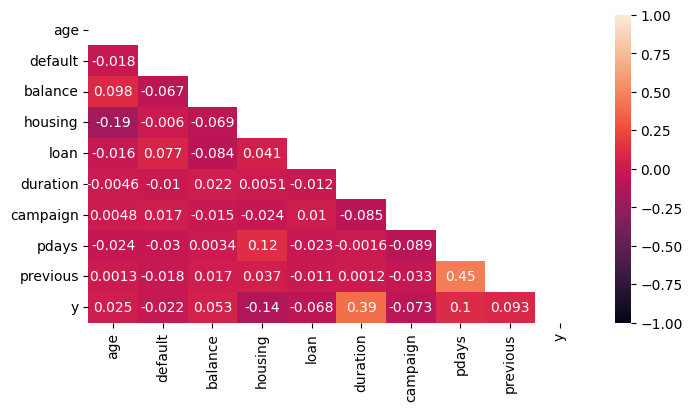

In [17]:
# Correlation Test

plt.figure(figsize=(8,4))
mask = np.triu(np.ones_like(df_num.corr(), dtype=bool))
sns.heatmap(df_num.corr(), vmin=-1, vmax=1, mask=mask, annot=True)
plt.show()

There is no multicollinearity between independent variables

If have multicollinearity problem, we need to eliminate one or more of the highly correlated independent variables from the model. 
Another option is to use a dimensionality reduction technique, such as principal component analysis, to combine the highly correlated variables into a single composite variable that captures the underlying structure of the data.

In [18]:
df_num.describe(include='all')

,age,default,balance,housing,loan,duration,campaign,pdays,previous,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,0.018027,1362.272058,0.555838,0.160226,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,0.133049,3044.765829,0.496878,0.366820,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,0.000000,-8019.000000,0.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,0.000000,72.000000,0.000000,0.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,0.000000,448.000000,1.000000,0.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,0.000000,1428.000000,1.000000,0.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,1.000000,102127.000000,1.000000,1.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


In [19]:
df_num[['age', 'balance', 'duration', 'campaign', 'previous']].skew()

age          0.684818
balance      8.360308
duration     3.144318
campaign     4.898650
previous    41.846454
dtype: float64

In [20]:
df_num[['age', 'balance', 'duration', 'campaign', 'previous']].kurtosis()

age            0.319570
balance      140.751547
duration      18.153915
campaign      39.249651
previous    4506.860660
dtype: float64

In [21]:
def plot_histogram(data, name, bins=30, kde=True, figsize=(8,4)):
    plt.figure(figsize=figsize)
    sns.set_theme(style="whitegrid")
    sns.histplot(x=data[name], data=data, hue='y', kde=kde)
    # plt.title(name)
    plt.show()

    plt.figure(figsize=figsize)
    sns.set_theme(style="whitegrid")
    sns.histplot(x=data[name], data=data, kde=kde)
    # plt.title(name)
    plt.show()


    plt.figure(figsize=figsize)
    sns.set_theme(style="whitegrid")
    sns.kdeplot(x=data[name], data=data, cumulative=True)
    # plt.title(name)
    plt.show()

In [22]:
train

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,cellular,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,0,1729,0,0,cellular,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,0,5715,0,0,cellular,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,0,668,0,0,telephone,508,4,-1,0,unknown,0


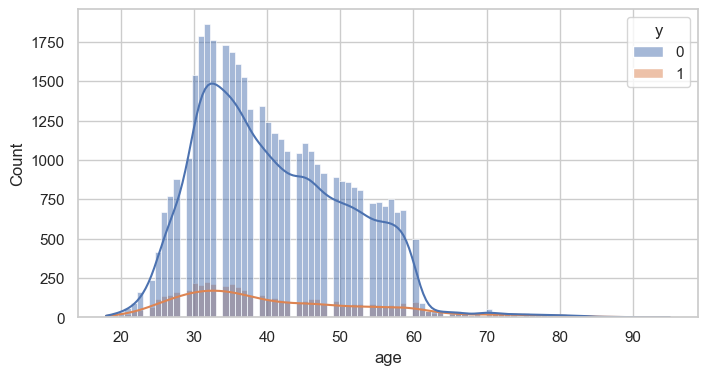

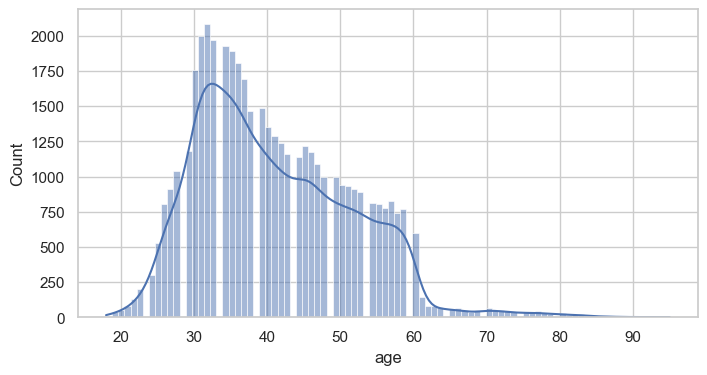

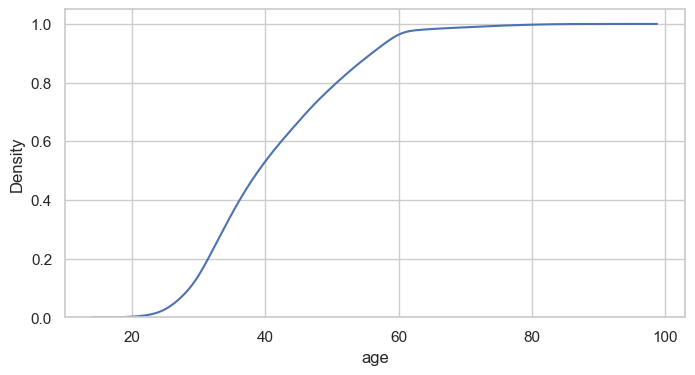

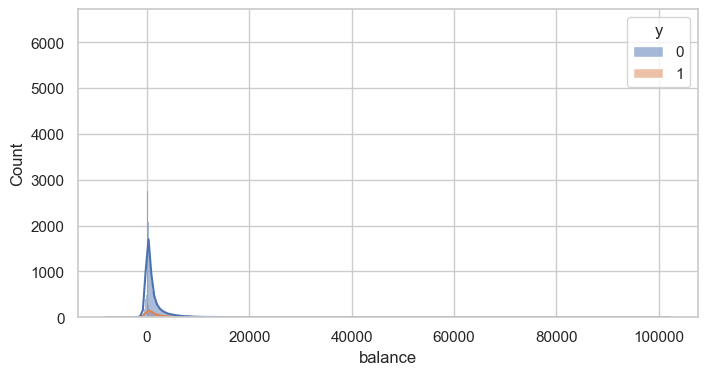

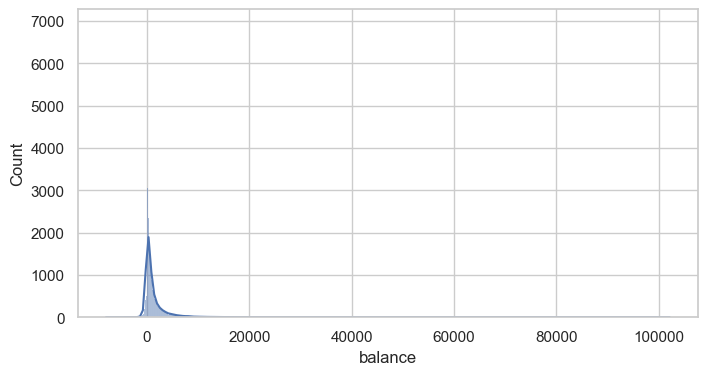

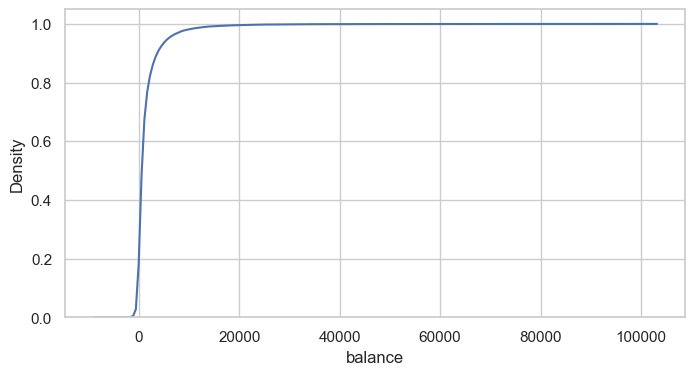

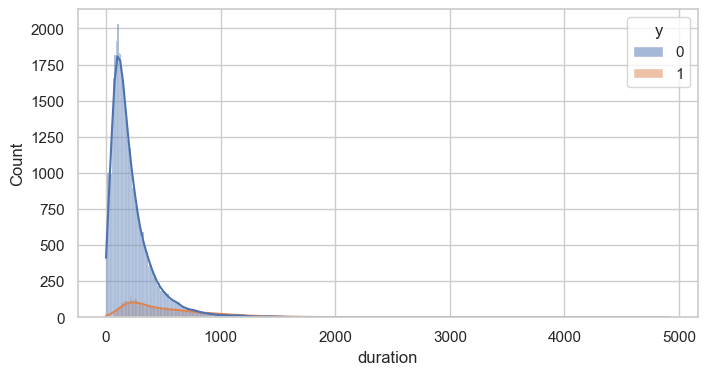

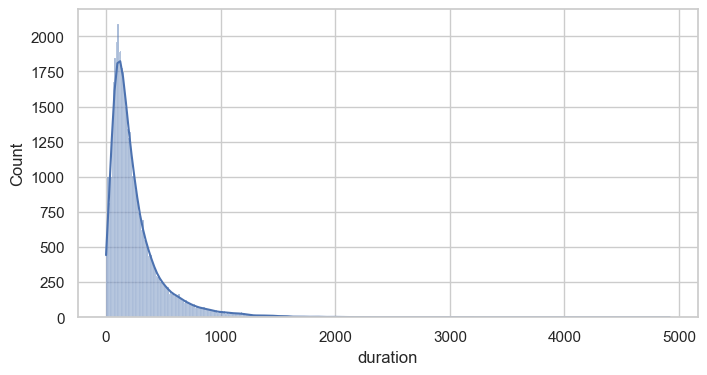

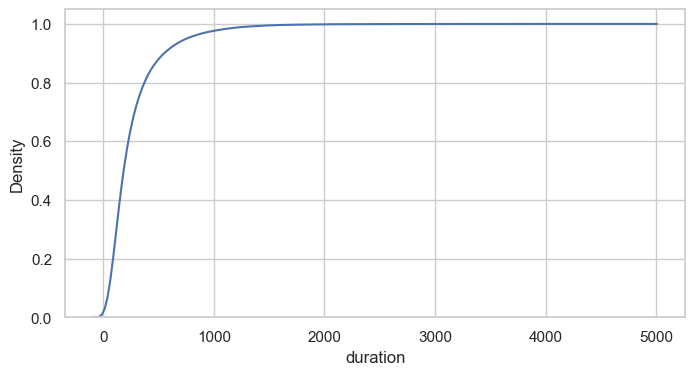

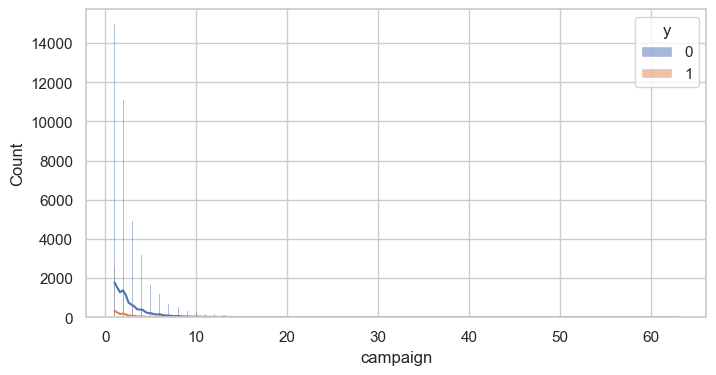

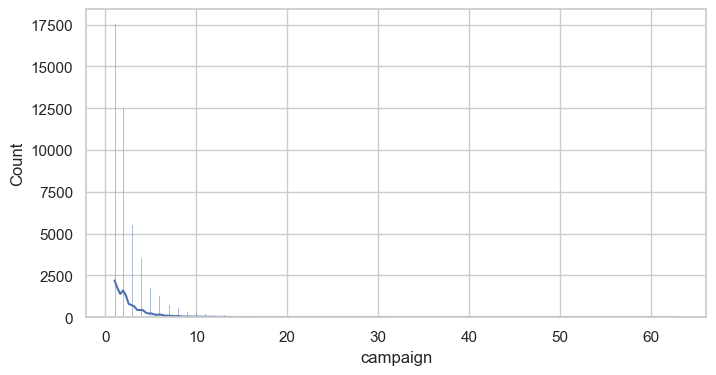

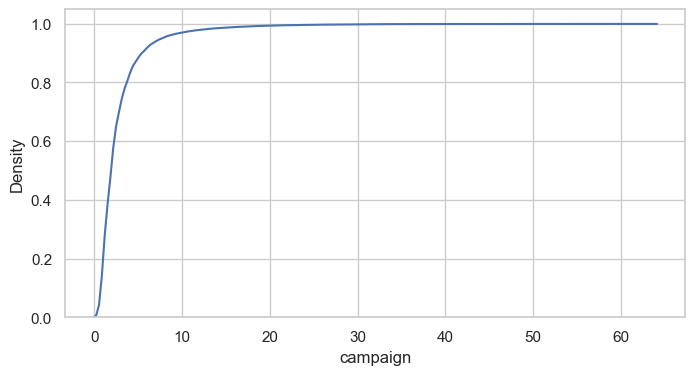

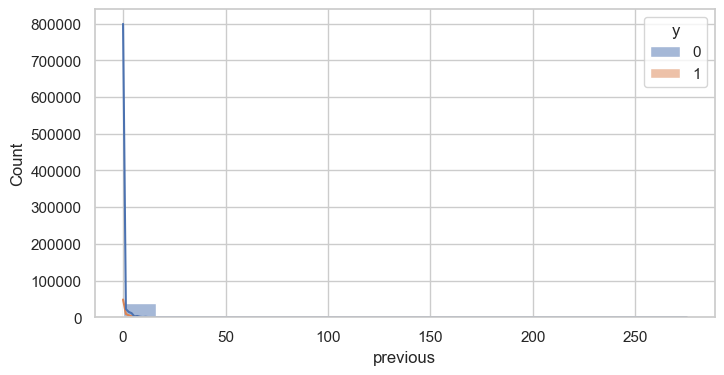

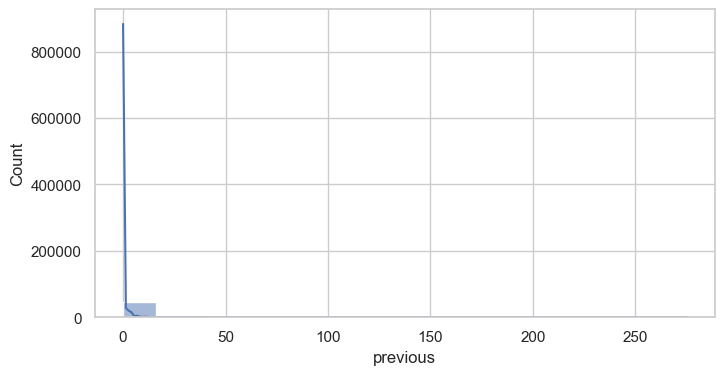

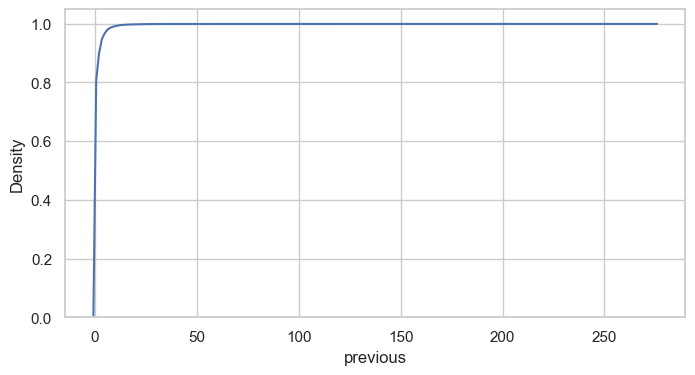

In [23]:
for col in ['age', 'balance', 'duration', 'campaign', 'previous']:
    plot_histogram(train, col)

In [24]:
df_num

,age,default,balance,housing,loan,duration,campaign,pdays,previous,y
0,58,0,2143,1,0,261,1,-1,0,0
1,44,0,29,1,0,151,1,-1,0,0
2,33,0,2,1,1,76,1,-1,0,0
3,47,0,1506,1,0,92,1,-1,0,0
4,33,0,1,0,0,198,1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,977,3,-1,0,1
45207,71,0,1729,0,0,456,2,-1,0,1
45208,72,0,5715,0,0,1127,5,184,3,1
45209,57,0,668,0,0,508,4,-1,0,0


In [25]:
x = df_num[df_num.columns[:-1]]
y = df_num[df_num.columns[-1]]

x = MinMaxScaler().fit_transform(x)

In [26]:
# ANOVA

f_score, p_value = f_classif(x, y)

In [27]:
f_score

array([  28.62523309,   22.73392322,  126.57227551,  892.95057646,
        211.16739503, 8333.76114833,  243.35840443,  490.69656268,
        396.44398944])

In [28]:
for i in range(len(df_num.columns[:-1])):
    print(df_num.columns[:-1][i], ': ', p_value[i])

age :  8.82564369173634e-08
default :  1.866326526158345e-06
balance :  2.521113691910737e-29
housing :  2.621926571845309e-194
loan :  9.793657535311501e-48
duration :  0.0
campaign :  1.0123473643070218e-54
pdays :  3.7905533194863624e-108
previous :  7.801830349573926e-88


Conclusion:

All numerical features are significant variables because the P-Value < 0.05.

In [29]:
df_cat

,job,marital,education,poutcome,y
0,management,married,tertiary,unknown,0
1,technician,single,secondary,unknown,0
2,entrepreneur,married,secondary,unknown,0
3,blue-collar,married,unknown,unknown,0
4,unknown,single,unknown,unknown,0
...,...,...,...,...,...
45206,technician,married,tertiary,unknown,1
45207,retired,divorced,primary,unknown,1
45208,retired,married,secondary,success,1
45209,blue-collar,married,secondary,unknown,0


Feature Selection 2: Categorical Input to Categorical Output

Method: Chi-squared Test

In [30]:
df_cat

,job,marital,education,poutcome,y
0,management,married,tertiary,unknown,0
1,technician,single,secondary,unknown,0
2,entrepreneur,married,secondary,unknown,0
3,blue-collar,married,unknown,unknown,0
4,unknown,single,unknown,unknown,0
...,...,...,...,...,...
45206,technician,married,tertiary,unknown,1
45207,retired,divorced,primary,unknown,1
45208,retired,married,secondary,success,1
45209,blue-collar,married,secondary,unknown,0


In [31]:
le = LabelEncoder()

In [32]:
x = df_cat[df_cat.columns[:-1]]
y = df_cat[df_cat.columns[-1]]

for col in df_cat.columns[:-1]:
    x[col] = le.fit_transform(x[col])

/var/folders/q5/9z48stv9517gwm3f09lxn5_w0000gn/T/ipykernel_4526/101313240.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[col] = le.fit_transform(x[col])


In [33]:
x = MinMaxScaler().fit_transform(x)

In [34]:
chi_score, pvalue = chi2(x, y)

In [35]:
for i in range(len(df_cat.columns[:-1])):
    print(df_cat.columns[:-1][i], ': ', pvalue[i])

job :  4.64790131874352e-05
marital :  0.00011438719484978733
education :  3.885242371080897e-08
poutcome :  3.484216479936759e-09


Conclusion:

All categorical features are significant variables because the P-Value < 0.05.

In [36]:
train

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,cellular,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,0,1729,0,0,cellular,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,0,5715,0,0,cellular,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,0,668,0,0,telephone,508,4,-1,0,unknown,0


In [37]:
test

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,0,1787,0,0,cellular,79,1,-1,0,unknown,0
1,33,services,married,secondary,0,4789,1,1,cellular,220,1,339,4,failure,0
2,35,management,single,tertiary,0,1350,1,0,cellular,185,1,330,1,failure,0
3,30,management,married,tertiary,0,1476,1,1,unknown,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,0,0,1,0,unknown,226,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,0,-333,1,0,cellular,329,5,-1,0,unknown,0
4517,57,self-employed,married,tertiary,1,-3313,1,1,unknown,153,1,-1,0,unknown,0
4518,57,technician,married,secondary,0,295,0,0,cellular,151,11,-1,0,unknown,0
4519,28,blue-collar,married,secondary,0,1137,0,0,cellular,129,4,211,3,other,0


We need to transform the categorical features. There are two ways of doing this which are Label Encoding and One Hot Encoding.

- job : We will use Label Encoding because there are a lot of categories.
- education : We will use Label Encoding because it is an ordinal categorical feature.
- marital : We will use One Hot Encoding.
- poutcome : We will use One Hot Encoding.
- contact: We will use One Hot Encoding.

In [46]:
def save_encoder(encoder, destination):
    folder_name = "/".join(destination.split('/')[:-1])
    if not os.path.exists(folder_name):
        os.makedirs(folder_name)
    np.save(destination, encoder.classes_)

In [38]:
# Label Encoding
le = LabelEncoder()
train['job'] = le.fit_transform(train['job'])
test['job'] = le.transform(test['job'])

In [47]:
save_encoder(le, './encoder/label_job_classes.npy')

In [48]:
# One hot encoding
train = pd.get_dummies(train, columns=['marital', 'poutcome', 'contact'])
test = pd.get_dummies(test, columns=['marital', 'poutcome', 'contact'])

In [49]:
train

,age,job,education,default,balance,housing,loan,duration,campaign,pdays,...,marital_divorced,marital_married,marital_single,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,contact_cellular,contact_telephone,contact_unknown
0,58,4,tertiary,0,2143,1,0,261,1,-1,...,0,1,0,0,0,0,1,0,0,1
1,44,9,secondary,0,29,1,0,151,1,-1,...,0,0,1,0,0,0,1,0,0,1
2,33,2,secondary,0,2,1,1,76,1,-1,...,0,1,0,0,0,0,1,0,0,1
3,47,1,unknown,0,1506,1,0,92,1,-1,...,0,1,0,0,0,0,1,0,0,1
4,33,11,unknown,0,1,0,0,198,1,-1,...,0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,tertiary,0,825,0,0,977,3,-1,...,0,1,0,0,0,0,1,1,0,0
45207,71,5,primary,0,1729,0,0,456,2,-1,...,1,0,0,0,0,0,1,1,0,0
45208,72,5,secondary,0,5715,0,0,1127,5,184,...,0,1,0,0,0,1,0,1,0,0
45209,57,1,secondary,0,668,0,0,508,4,-1,...,0,1,0,0,0,0,1,0,1,0


In [50]:
train[['education']].value_counts()

education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
dtype: int64

In [51]:
# Ordinal Encoding
train['education'].replace(['primary', 'secondary', 'tertiary', 'unknown'], [1, 2, 3, 0], inplace=True)
test['education'].replace(['primary', 'secondary', 'tertiary', 'unknown'], [1, 2, 3, 0], inplace=True)

In [52]:
train

,age,job,education,default,balance,housing,loan,duration,campaign,pdays,...,marital_divorced,marital_married,marital_single,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,contact_cellular,contact_telephone,contact_unknown
0,58,4,3,0,2143,1,0,261,1,-1,...,0,1,0,0,0,0,1,0,0,1
1,44,9,2,0,29,1,0,151,1,-1,...,0,0,1,0,0,0,1,0,0,1
2,33,2,2,0,2,1,1,76,1,-1,...,0,1,0,0,0,0,1,0,0,1
3,47,1,0,0,1506,1,0,92,1,-1,...,0,1,0,0,0,0,1,0,0,1
4,33,11,0,0,1,0,0,198,1,-1,...,0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,3,0,825,0,0,977,3,-1,...,0,1,0,0,0,0,1,1,0,0
45207,71,5,1,0,1729,0,0,456,2,-1,...,1,0,0,0,0,0,1,1,0,0
45208,72,5,2,0,5715,0,0,1127,5,184,...,0,1,0,0,0,1,0,1,0,0
45209,57,1,2,0,668,0,0,508,4,-1,...,0,1,0,0,0,0,1,0,1,0


In [53]:
# Standardize numerical data

scaler = StandardScaler()

cols = ['age', 'job', 'education', 'default', 'balance', 'housing', 'loan', 'duration', 'campaign', 'pdays', 'previous']

X_train = pd.DataFrame(scaler.fit_transform(train[cols]))
X_test = pd.DataFrame(scaler.transform(test[cols]))

Y_train = train['y']
Y_test = test['y']


X_train.columns = cols
X_test.columns = cols

In [59]:
# save the scaler
pickle.dump(scaler, open('scaler.pkl', 'wb'))

In [54]:
len(cols)

11

In [55]:
X_train = pd.concat([X_train, train.iloc[:, len(cols)+1:]], axis=1)
X_test = pd.concat([X_test, test.iloc[:, len(cols)+1:]], axis=1)

In [56]:
Y_train.shape

(45211,)

In [60]:
X_train

,age,job,education,default,balance,housing,loan,duration,campaign,pdays,...,marital_divorced,marital_married,marital_single,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,contact_cellular,contact_telephone,contact_unknown
0,1.606965,-0.103820,1.206484,-0.13549,0.256419,0.893915,-0.436803,0.011016,-0.569351,-0.411453,...,0,1,0,0,0,0,1,0,0,1
1,0.288529,1.424008,-0.077715,-0.13549,-0.437895,0.893915,-0.436803,-0.416127,-0.569351,-0.411453,...,0,0,1,0,0,0,1,0,0,1
2,-0.747384,-0.714951,-0.077715,-0.13549,-0.446762,0.893915,2.289359,-0.707361,-0.569351,-0.411453,...,0,1,0,0,0,0,1,0,0,1
3,0.571051,-1.020516,-2.646114,-0.13549,0.047205,0.893915,-0.436803,-0.645231,-0.569351,-0.411453,...,0,1,0,0,0,0,1,0,0,1
4,-0.747384,2.035139,-2.646114,-0.13549,-0.447091,-1.118674,-0.436803,-0.233620,-0.569351,-0.411453,...,0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.947747,1.424008,1.206484,-0.13549,-0.176460,-1.118674,-0.436803,2.791329,0.076230,-0.411453,...,0,1,0,0,0,0,1,1,0,0
45207,2.831227,0.201746,-1.361914,-0.13549,0.120447,-1.118674,-0.436803,0.768224,-0.246560,-0.411453,...,1,0,0,0,0,0,1,1,0,0
45208,2.925401,0.201746,-0.077715,-0.13549,1.429593,-1.118674,-0.436803,3.373797,0.721811,1.436189,...,0,1,0,0,0,1,0,1,0,0
45209,1.512791,-1.020516,-0.077715,-0.13549,-0.228024,-1.118674,-0.436803,0.970146,0.399020,-0.411453,...,0,1,0,0,0,0,1,0,1,0


In [61]:
X_test

,age,job,education,default,balance,housing,loan,duration,campaign,pdays,...,marital_divorced,marital_married,marital_single,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,contact_cellular,contact_telephone,contact_unknown
0,-1.029906,1.729573,-1.361914,-0.135490,0.139496,-1.118674,-0.436803,-0.695712,-0.569351,-0.411453,...,0,1,0,0,0,0,1,1,0,0
1,-0.747384,0.812877,-0.077715,-0.135490,1.125461,0.893915,2.289359,-0.148192,-0.569351,2.984213,...,0,1,0,1,0,0,0,1,0,0
2,-0.559037,-0.103820,1.206484,-0.135490,-0.004031,0.893915,-0.436803,-0.284101,-0.569351,2.894327,...,0,0,1,1,0,0,0,1,0,0
3,-1.029906,-0.103820,1.206484,-0.135490,0.037352,0.893915,2.289359,-0.229737,0.399020,-0.411453,...,0,1,0,0,0,0,1,0,0,1
4,1.701139,-1.020516,-0.077715,-0.135490,-0.447419,0.893915,-0.436803,-0.124893,-0.569351,-0.411453,...,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,-0.747384,0.812877,-0.077715,-0.135490,-0.556789,0.893915,-0.436803,0.275068,0.721811,-0.411453,...,0,1,0,0,0,0,1,1,0,0
4517,1.512791,0.507311,1.206484,7.380625,-1.535528,0.893915,2.289359,-0.408361,-0.569351,-0.411453,...,0,1,0,0,0,0,1,0,0,1
4518,1.512791,1.424008,-0.077715,-0.135490,-0.350531,-1.118674,-0.436803,-0.416127,2.658552,-0.411453,...,0,1,0,0,0,0,1,1,0,0
4519,-1.218254,-1.020516,-0.077715,-0.135490,-0.073987,-1.118674,-0.436803,-0.501556,0.399020,1.705844,...,0,1,0,0,1,0,0,1,0,0


In [62]:
Y_train

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

In [63]:
train = pd.concat([X_train, Y_train], axis=1)

In [65]:
test = pd.concat([X_test, Y_test], axis=1)

In [66]:
train

,age,job,education,default,balance,housing,loan,duration,campaign,pdays,...,marital_married,marital_single,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,contact_cellular,contact_telephone,contact_unknown,y
0,1.606965,-0.103820,1.206484,-0.13549,0.256419,0.893915,-0.436803,0.011016,-0.569351,-0.411453,...,1,0,0,0,0,1,0,0,1,0
1,0.288529,1.424008,-0.077715,-0.13549,-0.437895,0.893915,-0.436803,-0.416127,-0.569351,-0.411453,...,0,1,0,0,0,1,0,0,1,0
2,-0.747384,-0.714951,-0.077715,-0.13549,-0.446762,0.893915,2.289359,-0.707361,-0.569351,-0.411453,...,1,0,0,0,0,1,0,0,1,0
3,0.571051,-1.020516,-2.646114,-0.13549,0.047205,0.893915,-0.436803,-0.645231,-0.569351,-0.411453,...,1,0,0,0,0,1,0,0,1,0
4,-0.747384,2.035139,-2.646114,-0.13549,-0.447091,-1.118674,-0.436803,-0.233620,-0.569351,-0.411453,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.947747,1.424008,1.206484,-0.13549,-0.176460,-1.118674,-0.436803,2.791329,0.076230,-0.411453,...,1,0,0,0,0,1,1,0,0,1
45207,2.831227,0.201746,-1.361914,-0.13549,0.120447,-1.118674,-0.436803,0.768224,-0.246560,-0.411453,...,0,0,0,0,0,1,1,0,0,1
45208,2.925401,0.201746,-0.077715,-0.13549,1.429593,-1.118674,-0.436803,3.373797,0.721811,1.436189,...,1,0,0,0,1,0,1,0,0,1
45209,1.512791,-1.020516,-0.077715,-0.13549,-0.228024,-1.118674,-0.436803,0.970146,0.399020,-0.411453,...,1,0,0,0,0,1,0,1,0,0


In [67]:
train.to_csv('./train_data.csv')
test.to_csv('./test_data.csv')